In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

G = 6.67430e-11            # gravitational constant, m^3 kg^-1 s^-2
M_earth = 5.972e24         # mass of Earth in kg
R_E = 6.371e6          # radius of Earth in meters


## 🚀 Projectiles and Cannon Simulation

Projectiles are something you will be familiar with from A-level. Using SUVAT equations, it's fairly simple to model and plot them in python just from the initial velocity $u$ and angle $\theta$.

$u_{x} = u\cos(\theta)$

$u_{y} = u\sin(\theta)$

$x = u_{x}t$ 

$y = u_{y}t - \frac{1}{2}gt^{2}$. 

Where $t$ is time, $g=9.81$ is acceleration due to gravity, and $x$ and $y$ are the horizontal and vertical displacements respectively. Below is a function which requires an input of initial velocity and angle of launch, and the plots the resultant projectile. 

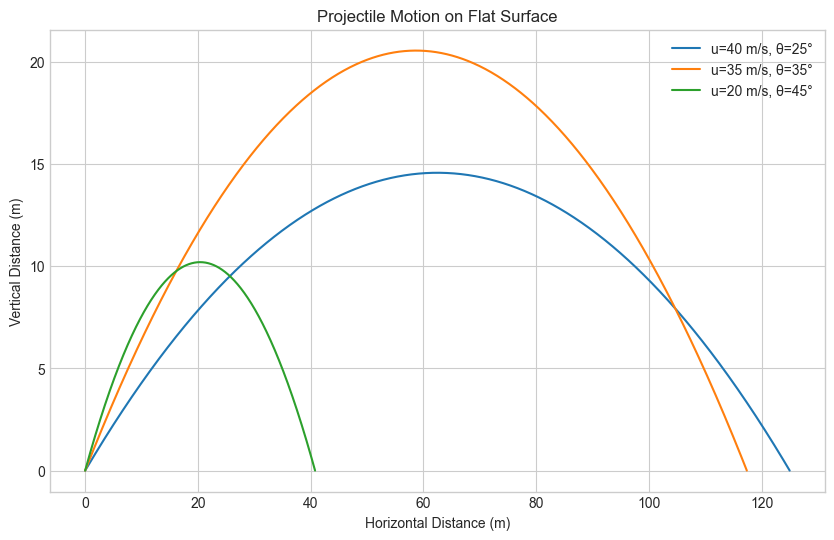

In [2]:

def simple_projectile(u, deg, ax):
    deg_rad = np.radians(deg) # convert degrees to radians
    g = 9.81

    t_flight = 2 * u * np.sin(deg_rad) / g # time until projectile hits the ground
    t = np.linspace(0, t_flight, 1000) 
    
    x = u * np.cos(deg_rad) * t    # horizontal distance
    y = u * np.sin(deg_rad) * t - 0.5 * g * t**2 # vertical distance
    
    ax.plot(x, y, label=f"u={u} m/s, θ={deg}°")
    
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))


simple_projectile(40, 25, ax) 
simple_projectile(35, 35, ax)
simple_projectile(20, 45, ax)



ax.set_title("Projectile Motion on Flat Surface")
ax.set_xlabel("Horizontal Distance (m)")
ax.set_ylabel("Vertical Distance (m)")
ax.grid(True)
ax.legend()
plt.show()


### Newton's Cannon 


Let's extend this concept to consider the curvature of the Earth, and maybe even launching our projectile into space. Let's explore the concept of 'Newton's Cannon', which posits that a cannon on a mountian can shoot a cannonball around the Earth at a certain velocity.  

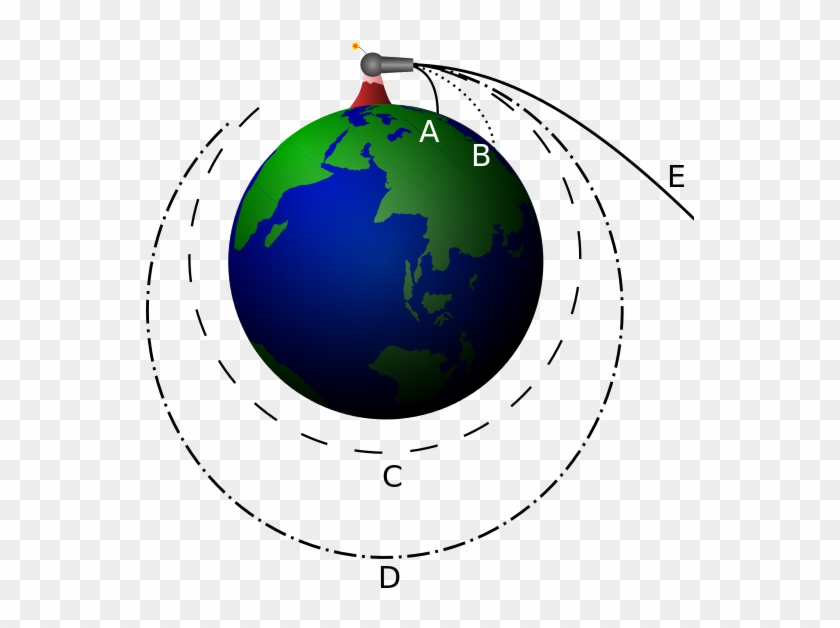

**A** and **B** - The initial velocity is insufficient to stably orbit the Earth $v < v_{orb}$. 

**C** - The iniital velocity is exactly the minimum orbital velocity required to orbit the Earth $v = v_{orb}$.

**D** - The initial velocity is greater than the minimum orbital velocity required to orbit the Earth, but less that the escape velocity, forming an elongated orbit $v_{orb} < v < v_{esc}$. 

**E** -The initial velocity is greater than, or equal to, the escape velocity, meaning that it has sufficient energy to escape Earth's orbit $ v_{esc} \leq v$.  

By the end of this demo, we should be able to simulate this! We can also introduce the concept of drag: a phenomenon missing in Newton's original concept. 




### Escape Velocity 

It may be useful for us to calculate the minmimum speed needed for the projectile to escape Earth's gravity, known as *escape velocity*. 

The total energy $E$ of the projectile is the sum of its Potential and Kinetic Energy, i.e:

$E = \frac{1}{2}mv^{2}-\frac{GMm}{r}$

where $r$ is the distance from the Earth's centre and $v$ is the speed at distance $r$. 

At the escape velocity $v_{esc}$, the kinetic energy is equal to the potential energy of the Earth.

$\frac{1}{2}mv_{esc}^{2}=\frac{GMm}{r}$

where $m$ can cancel out:

$\frac{1}{2}v_{esc}^{2}=\frac{GM}{r}$

and we can rearragne for v_{esc}:

$ v_{esc} = \sqrt{\frac{2GM}{r}}$



### Orbital Velocity 

For the orbital velocity, or the velocity required to keep an object in orbit, Gravitational Force = Centripetal Force. Therefore:

$F_{g} = \frac{GMm}{r^{2}}$

$F_{c} = \frac{mv^{2}}{r}$

$\frac{GMm}{r^{2}} = \frac{mv^{2}}{r}$

$v_{c} = \sqrt{\frac{GM}{r}}$

In [3]:
def orbital_velocity(h):
    r = R_E + h
    return np.sqrt(G * M_earth / r)

altitude = 0
vc = orbital_velocity(altitude)


print(f'The orbital velocity of an object at altitude {altitude} is {vc:.0f} m/s')


def escape_velocity(h):
    r = R_E + h
    return np.sqrt(2* G * M_earth / r)

vesc = escape_velocity(altitude)


print(f'The escape velocity of an object at altitude {altitude} is {vesc:.0f} m/s')

The orbital velocity of an object at altitude 0 is 7910 m/s
The escape velocity of an object at altitude 0 is 11186 m/s


Exercise: in the above cell, run the functions at different altitudes. Is there anything you notice about the relationship between the two speeds?

### Newton's Law of Gravitation:

First we'll need to consider a more realistic approach to downwards acceleration rather than simply $g$. The force between the Earth and our projectile can be calculated using Newton's Law of Gravitation. 

$ \vec{F} = -\frac{GMm}{r^{2}}\hat{r}$

where:

$G$ is Newton's Gravitational Constant, 

$M$ is the mass of the Earth, 

$m$ is the mass of the projectile, 

$r$ is the distance from Earth's centre. 


### Equations of motion:

From this we can derive the following equations of motion. 

$ \frac{d\vec{r}}{dt} = \vec{v},  \frac{d\vec{v}}{dt} = -\frac{GM}{r^{3}}\vec{r}$

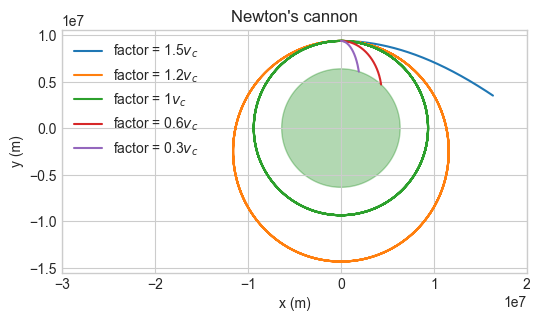

In [4]:
from newtons_cannon import newtons_cannon  


plt.style.use('seaborn-v0_8-whitegrid')

# Set up the plot once
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the Earth
R_E = 6_371_000
theta = np.linspace(0, 2*np.pi, 400)
ax.fill(R_E*np.cos(theta), R_E*np.sin(theta),
        color='green', alpha=0.3, zorder=0)

# newtons_cannon(orbital velocity, angle of inclination, altitude in km, ax, time of simulation in seconds, label)

newtons_cannon(1.5, 0, 3000, ax, 2000, label=f'factor = 1.5$v_c$')
newtons_cannon(1.1, 0, 3000, ax, 50000, label=f'factor = 1.2$v_c$')
newtons_cannon(1, 0, 3000, ax, 50000, label=f'factor = 1$v_c$')
newtons_cannon(0.6, 0, 3000, ax, 50000, label=f'factor = 0.6$v_c$')
newtons_cannon(0.3, 0, 3000, ax, 50000, label=f'factor = 0.3$v_c$')


ax.set_aspect('equal')
ax.set_xlim(-3e7,2e7)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title("Newton's cannon")
ax.legend(loc='upper left')
plt.show()


### Air resistance

In A-level, you will be used to the phrase 'assume no air resistance', but let's instead assume! The equation we can use to model the drag force felt on the projectile is:

$\vec{F}_{drag} = -\frac{1}{2}C_{d}\rho A\vec{v}$, 

where $C_{d}$ is the drag coefficient (depends on the shape of the object), $\rho$ is the fluid density, and $A$ is the cross-sectional area of the projectile. Note the minus sign meaning the force opposes the motion of the object. The acceleration due to drag is therefore. 

$\vec{a}_{drag} = \frac{\vec{F}_{drag}}{m}$

We can fairly simply implement this equation into python, and plot our results. If you're curious about what that function looks like, then check out the attached python file newtons_cannon.py.


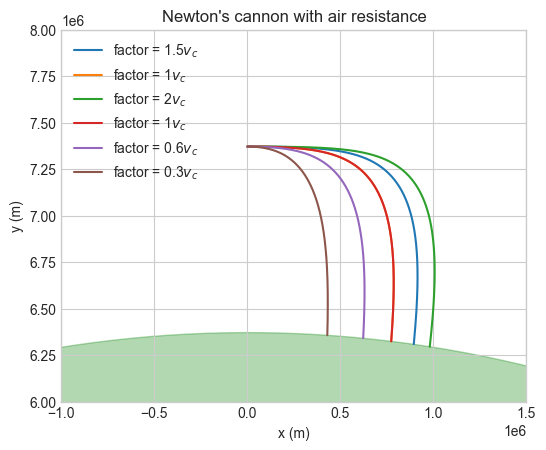

In [5]:
from newtons_cannon import newtons_cannon_drag

fig, ax = plt.subplots(figsize=(6,6))

theta = np.linspace(0, 2*np.pi, 400)
ax.fill(R_E*np.cos(theta), R_E*np.sin(theta),
        color='green',   
        alpha=0.3,         
        zorder=0)   

plt.style.use('seaborn-v0_8-whitegrid')

for i in [1.5, 1,2, 1, 0.6, 0.3]:
    newtons_cannon_drag(i, 0, 1000, ax, 100000, label=f'factor = {i}$v_c$')

ax.grid(True)
ax.set_aspect('equal')

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_xlim(-1e6, 1.5e6)
ax.set_ylim(6e6, 8e6)
ax.set_title("Newton's cannon with air resistance")
ax.legend()
plt.show()


We can see here a drastically different picture 1000km in the sky. In that case, how can satellites orbit the earth if drag just causes them to fall? In the above model, we've assumed that the density of the atmosphere is homogenous. That is, its the same for all altitudes. However, we know that not to be the case: the air gets thinner the higher our altitude. We can use this equation to model this relationship: 

$\rho = \rho_{0}e^{\frac{h}{H}}$

where $\rho_{0}$ is the air density at sea level, $h$ is the alitude above sea level, and $H$ is the scale height.  


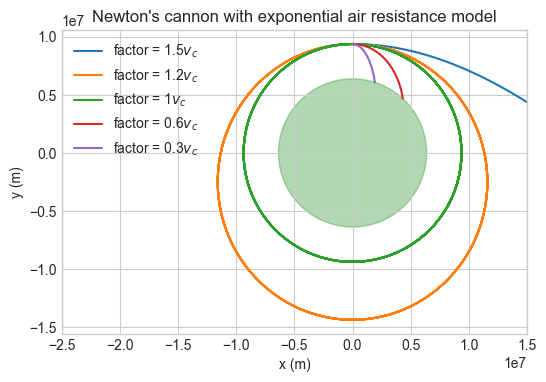

In [6]:
from newtons_cannon import newtons_cannon_drag_atmo

plt.style.use('seaborn-v0_8-whitegrid') 
fig, ax = plt.subplots(figsize=(6,6))
theta = np.linspace(0, 2*np.pi, 400)
ax.fill(R_E*np.cos(theta), R_E*np.sin(theta),
        color='green',   
        alpha=0.3,         
        zorder=0)   

newtons_cannon_drag_atmo(1.5, 0, 3000, ax, 2000, label=f'factor = 1.5$v_c$')
newtons_cannon_drag_atmo(1.1, 0, 3000, ax, 50000, label=f'factor = 1.2$v_c$')
newtons_cannon_drag_atmo(1, 0, 3000, ax, 50000, label=f'factor = 1$v_c$')
newtons_cannon_drag_atmo(0.6, 0, 3000, ax, 50000, label=f'factor = 0.6$v_c$')
newtons_cannon_drag_atmo(0.3, 0, 3000, ax, 50000, label=f'factor = 0.3$v_c$')


ax.set_aspect('equal')
ax.set_xlabel('x (m)'); ax.set_ylabel('y (m)')
ax.set_xlim(-2.5e7, 1.5e7)
ax.set_title("Newton's cannon with exponential air resistance model")
ax.legend(loc = 'upper left')
plt.show()


This looks almost identical to our original plot, simply because our altitude is so high. If, however, we were to launch our cannon from the ground, we will notice a difference in proejctile between ecah model:

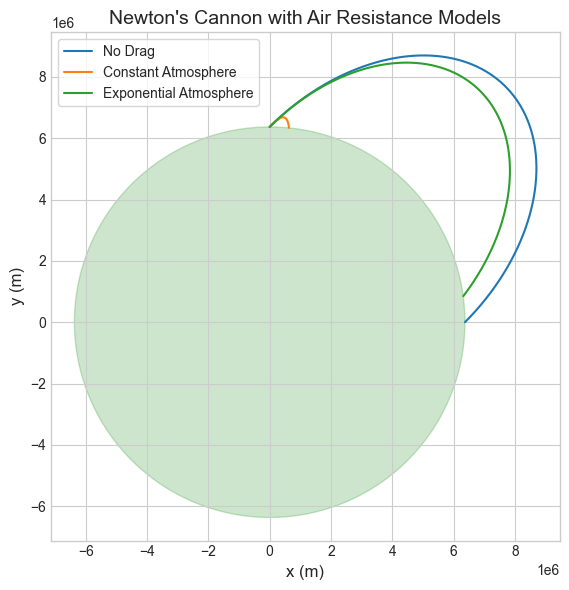

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(8, 6))

theta = np.linspace(0, 2*np.pi, 400)
R_E = 6_371_000
ax.fill(R_E*np.cos(theta), R_E*np.sin(theta),
        color='green', alpha=0.2, zorder=0)

# Trajectories
newtons_cannon(1, 45, 0, ax, 100000, label='No Drag') 
newtons_cannon_drag(1, 45, 0, ax, 100000, label='Constant Atmosphere', mass=1000) 
newtons_cannon_drag_atmo(1, 45, 0, ax, 100000, label='Exponential Atmosphere', mass=1000) 

ax.set_aspect('equal')
ax.set_xlabel('x (m)', fontsize=12)
ax.set_ylabel('y (m)', fontsize=12)
ax.set_title("Newton's Cannon with Air Resistance Models", fontsize=14)
ax.legend(loc='upper left', fontsize=10, frameon=True)
ax.grid(True)
plt.tight_layout()
plt.show()

Here we can see a noticeable difference in each model, and how the exponential atmosphere model is the most true to reality. 


### Ratios

If we want the projectlie in our function to escape its orbit, we need to put in the escape velocity in terms of the orbital velocity, i.e.:

$\frac{v_{esc}}{v_{orb}} = \frac{\sqrt{\frac{2GM}{r}}}{\sqrt{\frac{GM}{2}}}$

which simplifies down to:
 
$\frac{v_{esc}}{v_{orb}} = \sqrt{2}$


This means that the escape velocity is always $\sqrt{2}$ times greater that the orbital velocity at the same altitude.

Exercise: confirm in the cell below that the ratio between the two values is independent of the alititude.

In [8]:

def escape_velocity_factor(h):
    
    return escape_velocity(h)/orbital_velocity(h)


### YOUR CODE HERE ###

v_esc = escape_velocity_factor(altitude)
print(f"Ratio of escape velocity to orbital velocity at {altitude} m: {v_esc:.2f}")


Ratio of escape velocity to orbital velocity at 0 m: 1.41


Exercise - Play around with these functions: how does each variable change the plots? What comparisons can you make? Can you get each type of projectile to escape the Earth's gravitational field?

/var/folders/dy/1fbk51z16s119n9v728_bp5w0000gn/T/ipykernel_6132/3217404414.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=10, frameon=True)


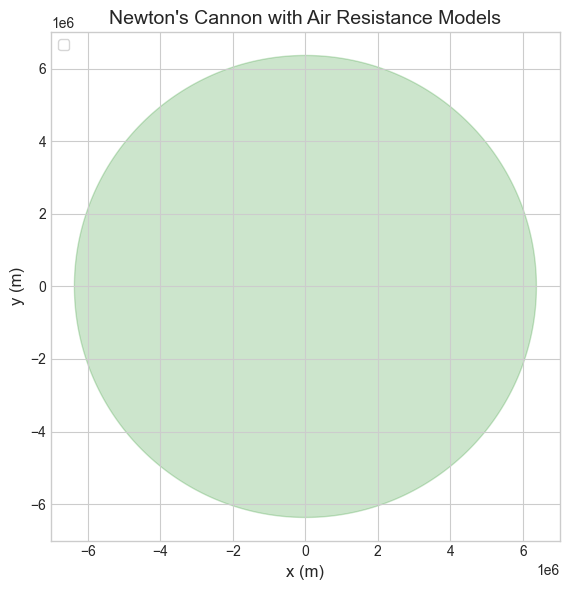

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(8, 6))

theta = np.linspace(0, 2*np.pi, 400)
R_E = 6_371_000
ax.fill(R_E*np.cos(theta), R_E*np.sin(theta),
        color='green', alpha=0.2, zorder=0)

### YOUR CODE HERE ###


ax.set_aspect('equal')
ax.set_xlabel('x (m)', fontsize=12)
ax.set_ylabel('y (m)', fontsize=12)
ax.set_title("Newton's Cannon with Air Resistance Models", fontsize=14)
ax.legend(loc='upper left', fontsize=10, frameon=True)
ax.grid(True)
plt.tight_layout()
plt.show()